In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
import glob
uni = "210917_4top_1layer_re"

path = "/users/yewzzang/work/HEPGNN_4top/result/*" + uni +"*/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]




path = "/users/yewzzang/work/HEPGNN_4top/result/*"+uni +"*/*"+uni +".csv"
pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]

path = "/users/yewzzang/work/HEPGNN_4top/result/*"+uni +"*/*"+uni +"_feature.csv"
feature_path = glob.glob(path)
feature_list = [file for file in feature_path if file.endswith(".csv")]

path = "/users/yewzzang/work/HEPGNN_4top/result/*"+uni +"*/*"+uni +"_pos.csv"
pos_path = glob.glob(path)
pos_list = [file for file in pos_path if file.endswith(".csv")]

path = "/users/yewzzang/work/HEPGNN_4top/result/*"+uni +"*/*"+uni +"_batch.csv"
batch_path = glob.glob(path)
batch_list = [file for file in batch_path if file.endswith(".csv")]




d = train_list
dd = pred_list
ddd = feature_list
dddd = pos_list
ddddd = batch_list

In [3]:
dd

['/users/yewzzang/work/HEPGNN_4top/result/210917_4top_1layer_re/210917_4top_1layer_re.csv']

In [4]:
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

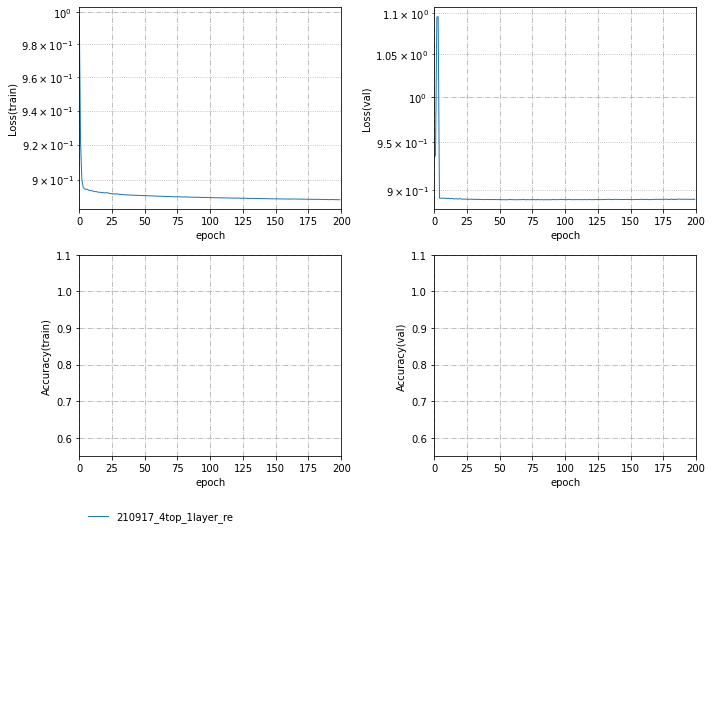

In [5]:
plt.rcParams['figure.figsize'] = (10, 10)
# plt.rcParams['figure.figsize'] = (10, 10)
ax1 = plt.subplot(3, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(3, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')
# ax1 = plt.subplot(3, 2, 1, ylabel='Loss(train)', xlabel='epoch')
# ax2 = plt.subplot(3, 2, 2, ylabel='Loss(val)', xlabel='epoch')
ax3 = plt.subplot(3, 2, 3, ylabel='Accuracy(train)', xlabel='epoch')
ax4 = plt.subplot(3, 2, 4, ylabel='Accuracy(val)', xlabel='epoch')
# ax1.set_ylim([0, 100])
# ax2.set_ylim([0, 100])
ax3.set_ylim([0.55,1.1])
ax4.set_ylim([0.55,1.1])
for ax in (ax1, ax2, ax3, ax4):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([0,200])
lines, labels = [], []

for i in range(len(d)):
    df = pd.read_csv(d[i])
    
    label = d[i].split('/')[-2].replace('__', ' ')
    if label.split('_')[0] == '210817':
        l =  ax1.plot(df['loss'], linewidth=2)
        ax2.plot(df['val_loss'], linewidth=2)
        ax3.plot(df['acc'], linewidth=2)
        ax4.plot(df['val_acc'], linewidth=2)
    else:
        l =  ax1.plot(df['loss'])
        ax2.plot(df['val_loss'])
        ax3.plot(df['acc'])
        ax4.plot(df['val_acc'])
    
    
    
    
#     label = ddd[i]
    
    
    
    
    lines.append(l[0])
    labels.append(label)
ax5 = plt.subplot(3,1,3)
ax5.legend(lines, labels)
# ax5.legend(lines, labels, bbox_to_anchor=(1.1, -4, 7, 7))
ax5.axis('off')
plt.tight_layout()
# plt.savefig('acc_loss.png',dpi=300)
plt.show()
plt.close()

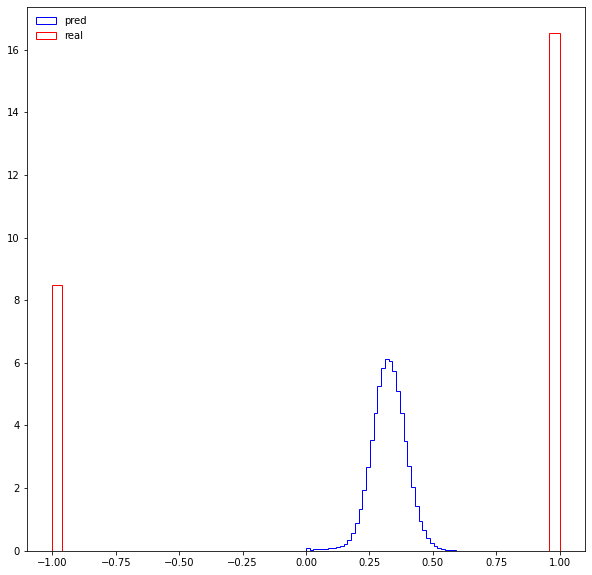

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score


#plt.yscale('log')
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
plt.hist(df['prediction'], histtype='step', 
             density=True, bins=50, color='blue',label='pred')        
plt.hist(df['weight'], histtype='step', 
             density=True, bins=50, color='red',label='real') 
plt.legend()

plt.show()

In [7]:
print(df['prediction'].max(),'max')
print(df['prediction'].min(),'min')
print(np.average(df['prediction']),'pred average')
print(np.average(df['weight']),'real average')

0.7405606508255005 max
6.714050823711424e-28 min
0.325134929446055 pred average
0.3220830364569989 real average


In [8]:
###### max pt
df3 = pd.read_csv(ddd[0])
df4 = pd.read_csv(ddddd[0])
df4 = np.array(df4)
df3 = np.array(df3).reshape(-1,4)  ## pt / eta / phi / mass

In [9]:
#### 각 batch 안에서 최대 max pt의 feature들 뽑기
a = 0
max_pt_features = []
for i in range(len(df4)):
    max_pt = df3[a:a+df4[i][0]].max()
    aaaa = np.where(max_pt)
    max_pt_jet = df3[a+aaaa[0]]
    max_pt_features.append(max_pt_jet)
    a += df4[i][0]

    
#     max_eta_feature = 

In [10]:
max_pt_weight = np.array(max_pt_features)[:,:,0]*np.array(df['weight']).reshape(-1,1)
max_pt_prediction = np.array(max_pt_features)[:,:,0]*np.array(df['prediction']).reshape(-1,1)

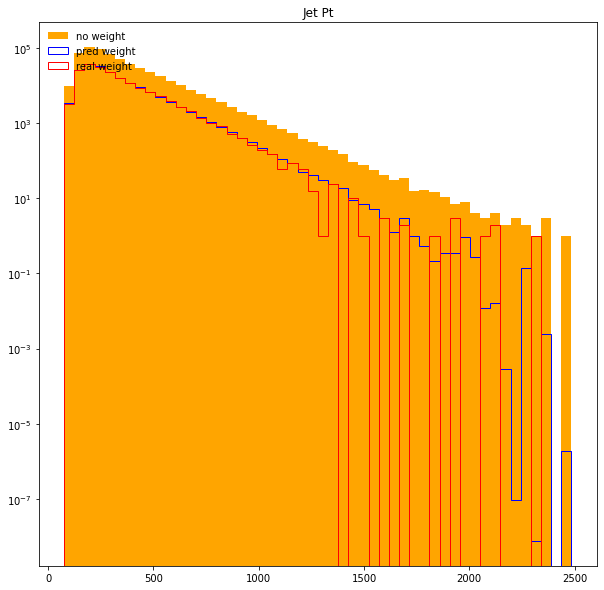

In [27]:
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
plt.hist(np.array(max_pt_features)[:,:,0], 
             density=False, log=True,bins=50, color='orange',label='no weight')    
plt.hist(np.array(max_pt_features)[:,:,0], histtype='step', 
             density=False, log=True,bins=50, color='blue',label='pred weight',weights = np.array(df['prediction']).reshape(-1,1))
plt.hist(np.array(max_pt_features)[:,:,0], histtype='step', 
             density=False, log=True,bins=50, color='red',label='real weight',weights = np.array(df['weight']).reshape(-1,1)) 
plt.legend()
plt.title('Jet Pt')
plt.show()

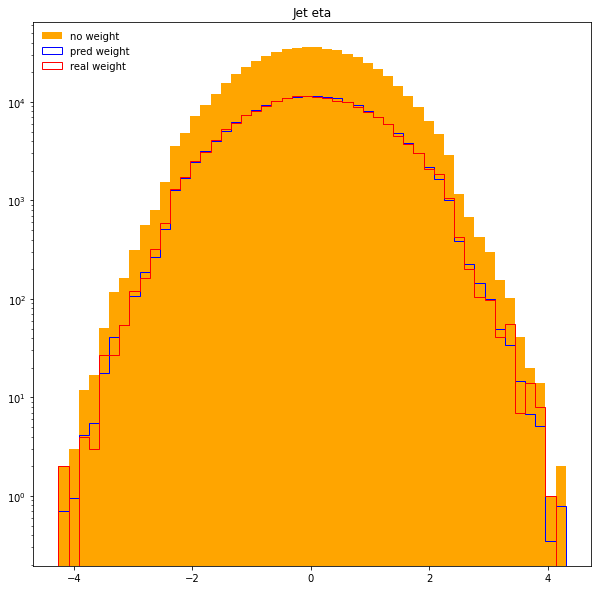

In [26]:
#### 각 batch 안에서 최대 max eta의 feature들 뽑기
max_pt_weight = np.array(max_pt_features)[:,:,1]*np.array(df['weight']).reshape(-1,1)
max_pt_prediction = np.array(max_pt_features)[:,:,1]*np.array(df['prediction']).reshape(-1,1)
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
plt.hist(np.array(max_pt_features)[:,:,1], 
             density=False, log=True,bins=50, color='orange',label='no weight')    
plt.hist(np.array(max_pt_features)[:,:,1], histtype='step', 
             density=False, log=True,bins=50, color='blue',label='pred weight',weights = np.array(df['prediction']).reshape(-1,1))
plt.hist(np.array(max_pt_features)[:,:,1], histtype='step', 
             density=False, log=True,bins=50, color='red',label='real weight',weights = np.array(df['weight']).reshape(-1,1)) 
plt.legend()
plt.title('Jet eta')
plt.show()



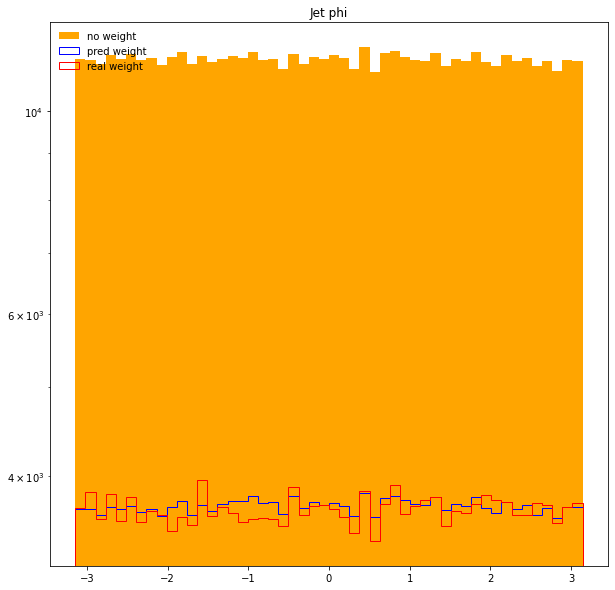

In [25]:
#### 각 batch 안에서 최대 max phi의 feature들 뽑기
max_pt_weight = np.array(max_pt_features)[:,:,2]*np.array(df['weight']).reshape(-1,1)
max_pt_prediction = np.array(max_pt_features)[:,:,2]*np.array(df['prediction']).reshape(-1,1)
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
plt.hist(np.array(max_pt_features)[:,:,2], 
             density=False,log=True, bins=50, color='orange',label='no weight')    
plt.hist(np.array(max_pt_features)[:,:,2], histtype='step', 
             density=False,log=True, bins=50, color='blue',label='pred weight',weights = np.array(df['prediction']).reshape(-1,1))
plt.hist(np.array(max_pt_features)[:,:,2], histtype='step', 
             density=False,log=True, bins=50, color='red',label='real weight',weights = np.array(df['weight']).reshape(-1,1)) 
plt.legend()
plt.title('Jet phi')
plt.show()



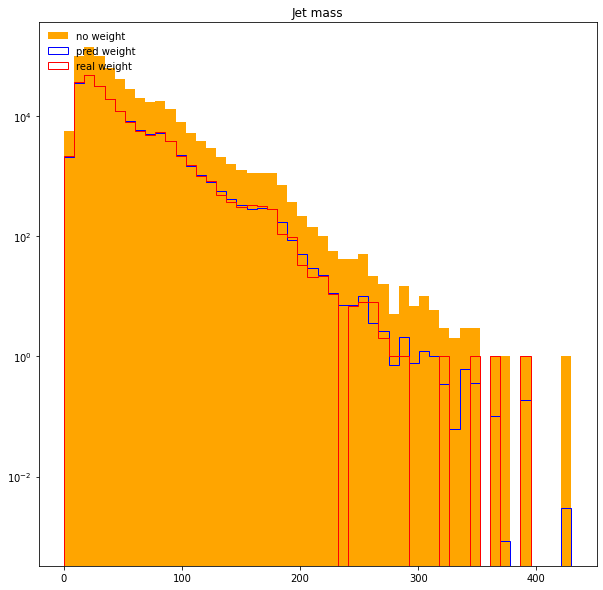

In [24]:
#### 각 batch 안에서 최대 max mass의 feature들 뽑기
max_pt_weight = np.array(max_pt_features)[:,:,3]*np.array(df['weight']).reshape(-1,1)
max_pt_prediction = np.array(max_pt_features)[:,:,3]*np.array(df['prediction']).reshape(-1,1)
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
plt.hist(np.array(max_pt_features)[:,:,3], 
             density=False, log=True, bins=50, color='orange',label='no weight')    
plt.hist(np.array(max_pt_features)[:,:,3], histtype='step', 
             density=False, log=True, bins=50, color='blue',label='pred weight',weights = np.array(df['prediction']).reshape(-1,1))
plt.hist(np.array(max_pt_features)[:,:,3], histtype='step', 
             density=False, log=True, bins=50, color='red',label='real weight',weights = np.array(df['weight']).reshape(-1,1)) 
plt.legend()
plt.title('Jet mass')
plt.show()



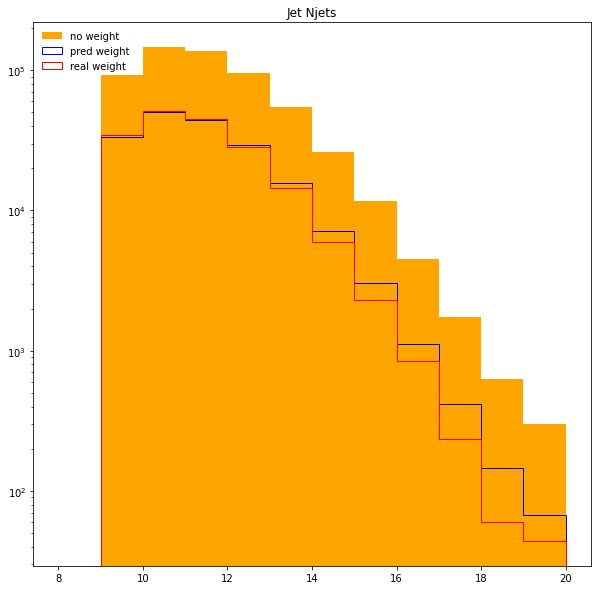

In [29]:
#### 각 batch 안에서 최대 max phi의 feature들 뽑기
max_pt_weight = np.array(max_pt_features)[:,:,2]*np.array(df['weight']).reshape(-1,1)
max_pt_prediction = np.array(max_pt_features)[:,:,2]*np.array(df['prediction']).reshape(-1,1)
plt.figure(figsize=(10,10))
df = pd.read_csv(dd[0])
plt.hist(np.array(df4), 
             density=False, bins=12, log=True,range=[8,20],color='orange',label='no weight')    
plt.hist(np.array(df4), histtype='step', 
             density=False, bins=12, log=True, range=[8,20],color='blue',label='pred weight',weights = np.array(df['prediction']).reshape(-1,1))
plt.hist(np.array(df4), histtype='step', 
             density=False, bins=12, log=True, range=[8,20],color='red',label='real weight',weights = np.array(df['weight']).reshape(-1,1)) 
plt.legend()
plt.title('Jet Njets')
plt.show()



In [16]:
df4

array([[ 9],
       [14],
       [15],
       ...,
       [10],
       [10],
       [11]])

In [17]:
# #### for QCD
# from sklearn.metrics import roc_curve, roc_auc_score
# df2 = pd.read_csv(dd[0])
# weight = df2['weight']

# #plt.yscale('log')
# plt.figure(figsize=(10,10))
# df = pd.read_csv(dd[0])
# plt.hist(df['prediction'], histtype='step', 
#              density=True, bins=4000, color='blue',label='pred',range=(0.999996,1.000006))        
# # plt.hist(df2['weight'], histtype='step', 
# #              density=True, bins=1000, color='red',label='real',range=(0.9,1.1)) 
# plt.legend()

# plt.show()